In [1]:
#env tffour
import pandas as pd

In [2]:
df = pd.read_pickle('df_save.pck')
df.head()

,Date,ArticleCode,Language,Title,Content
0,2015-01-05,1,en,WTO celebrates 20 years of helping global econ...,"GENEVA, Jan 1 (KUNA) -- The World Trade Organi..."
1,2015-01-05,2,fr,L'Organisation mondiale du commerce l'preuve d...,5 January 2015 Les Echos L'OMC s'est donn six ...
2,2015-01-05,3,en,"Delegates of 45 nations,WTO Chief to be at CII...","New Delhi, Jan 2 (PTI) Over 1,000 delegates fr..."
3,2015-01-05,4,en,"Compliance Rulings On Aircraft, Tuna, COOL To ...","World Trade Online Posted: December 30, 2014 A..."
4,2015-01-05,5,en,Sudan making new push at WTO membership: official,"Sudan Tribune 4 January 2015 January 3, 2015 (..."


In [3]:
df = df[df['Language'].isin(['en'])]
#combine title and contents
df['Text'] = df['Title'] + ' '+df['Content']

In [4]:
df[df['Text'].str.contains('S.Korea')].head()

,Date,ArticleCode,Language,Title,Content,Text
12,2015-01-06,1,en,S.Korea says imposes rice import tariff of ove...,"SEOUL, Jan 6 (Reuters) - South Korea confirmed...",S.Korea says imposes rice import tariff of ove...
171,2015-01-21,9,en,S.Korea to levy anti-dumping duty on Japan's p...,"[e]Yoo Seungki SEOUL, Jan. 21 (Xinhua) -- Sout...",S.Korea to levy anti-dumping duty on Japan's p...
770,2015-03-18,9,en,U.S. sets preliminary duties on Turkey pipe im...,"WASHINGTON, March 17 (Reuters) - The United St...",U.S. sets preliminary duties on Turkey pipe im...
2942,2015-11-02,4,en,"China, Japan, S Korea agree to boost trade, wo...",2 November 2015 TODAY (Singapore) SEOUL In a s...,"China, Japan, S Korea agree to boost trade, wo..."
3899,2016-02-15,10,en,S.Korea says time for more G20 policy coordina...,"15 February 2016 Reuters News SEOUL, Feb 15 (R...",S.Korea says time for more G20 policy coordina...


In [5]:
# Normalize words

replacements = {
    'Text': {
        r'\'s': '', 
        'Indian': 'India', 
        'nextgeneration': 'next generation', 
        '//iconnect\.wto\.org/': '', 
        '-': ' ', 
        'U.S.': 'United States', 
        'US': 'United States', 
        'S.Korea': 'South Korea', 
        'S. Korea': 'South Korea', 
        'WTO': 'world trade organization', 
        '‘': '', 
        'imports': 'import', 
        'Imports': 'import', 
        'exports': 'export', 
        'Exports': 'export', 
        'NZ ': 'New Zealand ', 
        '\"': '',
        '\'': '', 
    }
}

df.replace(replacements, regex=True, inplace=True)


In [6]:
df[df['Text'].str.contains('S.Korea')].head()

,Date,ArticleCode,Language,Title,Content,Text


In [7]:
texts = df['Text'].tolist()
titles = df['Title'].tolist()
dates = df['Date'].tolist()
articlecodes = df['ArticleCode'].tolist()

In [8]:
print(str(len(texts))+'texts')
print(str(len(titles))+'titles')
print(str(len(dates))+'dates')
print(str(len(articlecodes))+'articlecodes')

6409texts
6409titles
6409dates
6409articlecodes


In [9]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
import scipy
from sklearn import feature_extraction
import mpld3

In [10]:
nltk.download("stopwords")
my_stop_words = nltk.corpus.stopwords.words('english')

# Add my stopwords
my_stop_words = my_stop_words + ['world_trade_organization','years','year','said','important',
                                 'new','would','','','','']

[nltk_data] Downloading package stopwords to /home/nikhil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
from nltk.tokenize import MWETokenizer
tokenizer = MWETokenizer([('world', 'bank'), ('world', 'trade', 'organization'), ('doha', 'round'),
                          ('united', 'states'), ('european', 'union'), ('new', 'zealand'),
                          ('per', 'cent'),('south', 'korea'),
                          ])
tokenizer.tokenize("In a little or a european union little bit world trade organisation".split())

['In',
 'a',
 'little',
 'or',
 'a',
 'european_union',
 'little',
 'bit',
 'world',
 'trade',
 'organisation']

In [13]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [14]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [15]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in texts:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [16]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

In [17]:
vocab_frame = pd.DataFrame({'words':totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are '+str(vocab_frame.shape[0])+ ' items in vocab_frame')

there are 3776546 items in vocab_frame


In [18]:
vocab_frame.head(29)

,words
world,world
trade,trade
organ,organization
celebr,celebrates
year,years
of,of
help,helping
global,global
economi,economy
grow,grow


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features = 200000,
                                  min_df = 0.2, stop_words='english',
                                  use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
print(tfidf_matrix.shape)

CPU times: user 1min 36s, sys: 232 ms, total: 1min 36s
Wall time: 1min 37s
(6409, 160)


In [20]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                   min_df=0.1, stop_words=my_stop_words, 
                                   use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

print(tfidf_matrix.shape)

CPU times: user 1min 37s, sys: 276 ms, total: 1min 37s
Wall time: 1min 37s
(6409, 553)


In [21]:
terms = tfidf_vectorizer.get_feature_names()

In [22]:
terms

['abl',
 'accept',
 'access',
 'accord',
 'account',
 'achiev',
 'across',
 'act',
 'action',
 'activ',
 'ad',
 'addit',
 'address',
 'administr',
 'adopt',
 'advanc',
 'affect',
 'africa',
 'agenc',
 'agenda',
 'ago',
 'agre',
 'agreement',
 'agricultur',
 'ahead',
 'aim',
 'allow',
 'almost',
 'alreadi',
 'also',
 'although',
 'america',
 'american',
 'among',
 'ani',
 'announc',
 'annual',
 'anoth',
 'anti',
 'appli',
 'approach',
 'approv',
 'april',
 'area',
 'argu',
 'around',
 'asia',
 'asian',
 'ask',
 'associ',
 'august',
 'australia',
 'author',
 'back',
 'bank',
 'barrier',
 'base',
 'becaus',
 'becom',
 'befor',
 'beij',
 'believ',
 'benefit',
 'best',
 'better',
 'big',
 'biggest',
 'bilater',
 'billion',
 'bodi',
 'boost',
 'border',
 'brazil',
 'bring',
 'build',
 'busi',
 'call',
 'campaign',
 'canada',
 'capit',
 'case',
 'caus',
 'cent',
 'central',
 'certain',
 'challeng',
 'chang',
 'chief',
 'china',
 'chines',
 'claim',
 'clear',
 'close',
 'come',
 'comment',
 'c

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [24]:
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

CPU times: user 1min 22s, sys: 12 ms, total: 1min 22s
Wall time: 1min 22s


In [25]:
from sklearn.externals import joblib
joblib.dump(km, 'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [26]:
df_tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray())
df_tfidf_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,543,544,545,546,547,548,549,550,551,552
0,0.000000,0.0,0.00000,0.030459,0.042952,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.041667,0.032098,0.0,0.276834,0.296117,0.308745,0.000000,0.000000
1,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.099308,0.081712,0.085196,0.000000,0.000000
2,0.000000,0.0,0.00000,0.029550,0.000000,0.000000,0.0,0.0,0.021742,0.0,...,0.0,0.0,0.000000,0.015569,0.0,0.089522,0.110489,0.103681,0.000000,0.020787
3,0.037436,0.0,0.05518,0.045731,0.000000,0.035041,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.290941,0.359085,0.356570,0.033828,0.032170
4,0.000000,0.0,0.00000,0.056145,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.076804,0.000000,0.0,0.170094,0.125960,0.131332,0.000000,0.000000


In [27]:
news = {'date':dates, 'articlecode':articlecodes, 'title':titles, 'text':texts, 'cluster':clusters}
frame = pd.DataFrame(news, index=[clusters], columns=['date', 'articlecode', 'title', 'text', 'cluster'])

In [28]:
frame['cluster'].value_counts()

4    2291
1    1641
3    1344
0     615
2     518
Name: cluster, dtype: int64

In [29]:
from __future__ import print_function

print ("Top terms per cluster:")
print()

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" %i, end='')
    for ind in order_centroids[i, :6]:
        print('%s' %vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
print()
print()

Top terms per cluster:

Cluster 0 words:

/home/nikhil/anaconda/envs/tffour/lib/python3.4/site-packages/ipykernel/__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


b'india',b'trade',b'united',b'states',b'world',b'world',Cluster 1 words:b'trade',b'world',b'trade',b'world',b'organization',b'world',Cluster 2 words:b'steel',b'china',b'dump',b'trade',b'chinese',b'duties',Cluster 3 words:b'united',b'united',b'states',b'trade',b'tpp',b'dealing',Cluster 4 words:b'china',b'trade',b'eu',b'growth',b'countries',b'economy',



In [30]:
#print(frame[['Rank', 'Title']].loc[frame['cluster'] == 1].to_html(index=False))

KeyError: "['Rank' 'Title'] not in index"

In [31]:
import os

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

In [32]:
from nltk.tag import pos_tag
def strip_proppers_POS(text):
    tagged = pos_tag(text.split())
    non_propernouns = [word for word, pos in tagged if pos !='NNP' and pos != 'NNPS']
    return non_propernouns

In [33]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}

In [34]:
%matplotlib inline

/home/nikhil/anaconda/envs/tffour/lib/python3.4/site-packages/ipykernel/__main__.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


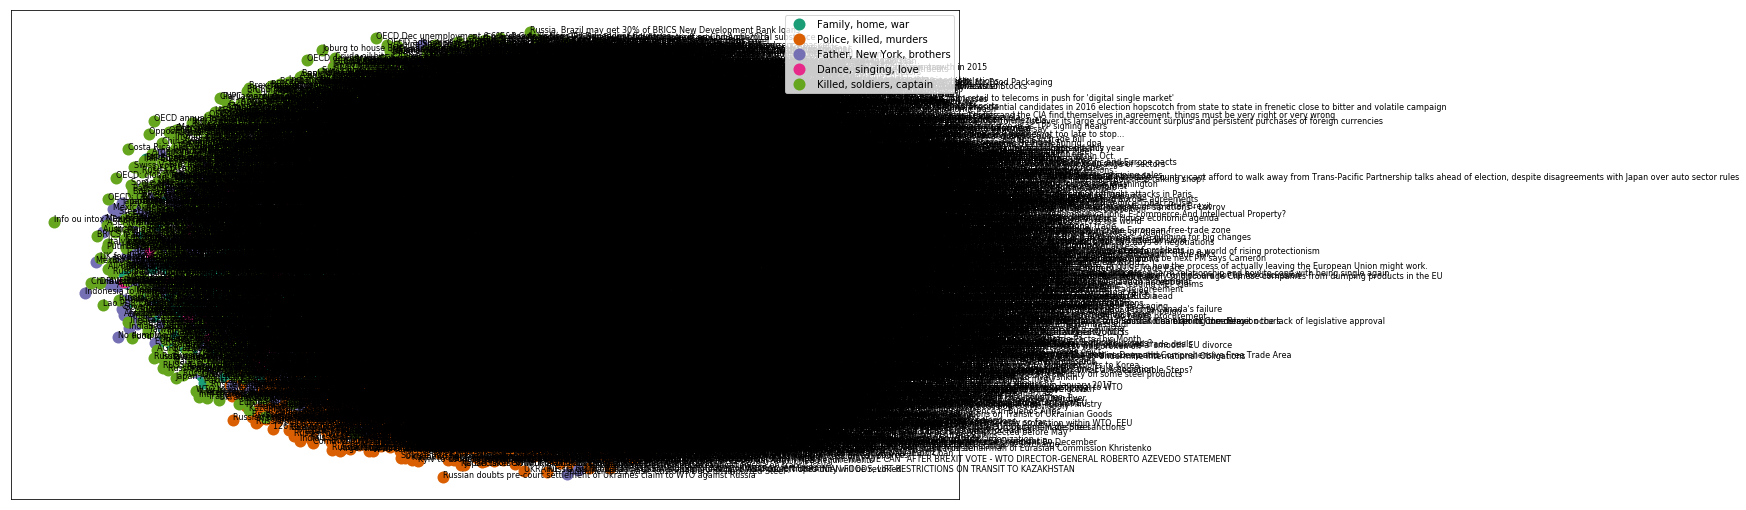

In [35]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [36]:
plt.close()

In [37]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [38]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=cluster_names[name], mec='none', color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

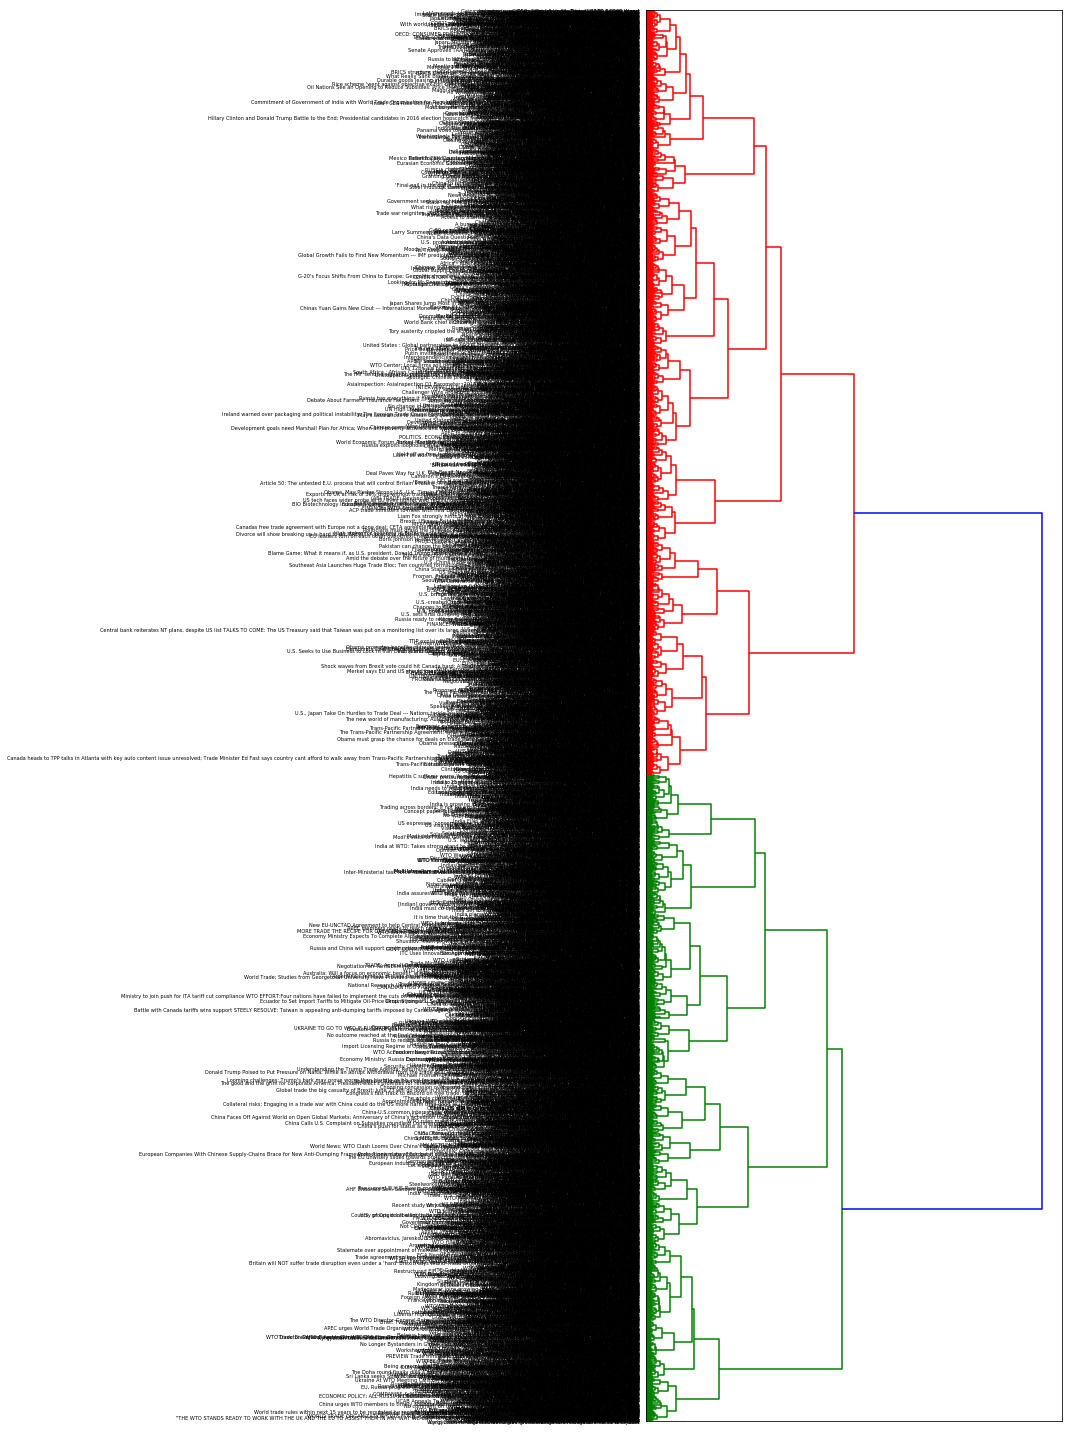

In [39]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [1]:
a = [1, 2,3,4,5]
b =a
b.append(4)
print (a)

[1, 2, 3, 4, 5, 4]


In [2]:
c = [1,2,3,4,5]
d = c[:]
d.append(2)
print(c)

[1, 2, 3, 4, 5]


In [3]:
print(a[::2])

[1, 3, 5]


In [4]:
a.append([1,2,3,4,5,5,6,3,7,7,8,4,5,6])

In [5]:
print(a)

[1, 2, 3, 4, 5, 4, [1, 2, 3, 4, 5, 5, 6, 3, 7, 7, 8, 4, 5, 6]]


In [6]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

In [8]:
print(a[4::5])

[5, 10, 15]


In [9]:
print(sum(a)/len(a))

9.0


In [10]:
a.extend([18,9,20,21,22,23,24,25,26,27,28])

In [11]:
print(a[4::5])

[5, 10, 15, 20, 25]


In [17]:
a[2:5] = c

In [18]:
print(a)

[1, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [19]:
del a[2:5]

In [20]:
print(a)

[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [22]:
a[2:2] = [3]
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [25]:
del a[1:len(c)+1] 
print(a)

[1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [26]:
a[0:2] = c
print(a)

[1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 17, 18, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [27]:
print(a.reverse())

None


In [28]:
a.reverse()

In [29]:
print(a)

[1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 17, 18, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [32]:
a.reverse()

In [33]:
print(a)

[1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 17, 18, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [41]:
def func(a):
    return a*2

b = [func(i) for i in a]
print(b)

[2, 4, 6, 8, 10, 22, 24, 26, 28, 30, 32, 34, 36, 18, 40, 42, 44, 46, 48, 50, 52, 54, 56]


In [45]:
a.extend([1,2,3,4,5])

In [47]:
print(sorted(a))

[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [85]:
c = map(func, a)

In [75]:
#print(list(c))

[2, 2, 4, 4, 6, 6, 8, 8, 10, 10, 18, 22, 24, 26, 28, 30, 32, 34, 36, 40, 42, 44, 46, 48, 50, 52, 54, 56, 2, 4, 6, 8, 10]


In [86]:
d = list(c)
print(d)

[2, 2, 4, 4, 6, 6, 8, 8, 10, 10, 18, 22, 24, 26, 28, 30, 32, 34, 36, 40, 42, 44, 46, 48, 50, 52, 54, 56, 2, 4, 6, 8, 10]


In [87]:
d = map(str, d)
d = ",".join(d)

In [88]:
print(d)

2,2,4,4,6,6,8,8,10,10,18,22,24,26,28,30,32,34,36,40,42,44,46,48,50,52,54,56,2,4,6,8,10


In [93]:
for x in range(1, 16):
    print ("Fizz"[x%3*4:]+"Buzz"[x%5*4:]or x)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


In [97]:
from collections import Counter
print(Counter(a))

Counter({1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 9: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1})


In [106]:
from itertools import combinations
#for x in combinations(a, 1):
#    print(x)

In [107]:
False  = True
if False:
    print("Hello")

SyntaxError: can't assign to keyword (<ipython-input-107-7fe5d6391a4f>, line 1)

In [110]:
cnt = Counter()
for word in ["red", 'green', 'blue', 'white', 'yellow', 'brown']:
    cnt[word] =cnt[word]+1
print(cnt)

Counter({'red': 1, 'yellow': 1, 'brown': 1, 'green': 1, 'blue': 1, 'white': 1})
